In [34]:
import os.path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
import warnings
warnings.simplefilter('ignore')

In [36]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

# Зчитування датасету на витік даних

In [37]:
print(os.path.exists("../data/study_performance.csv"))

True


In [38]:
ds = pd.read_csv("../data/study_performance.csv")

In [39]:
print('columns count - ',len(ds.columns), '\n')
print('columns: ',list(ds.columns))

columns count -  8 

columns:  ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course', 'math_score', 'reading_score', 'writing_score']


# Заповнення пропущених значень у датасеті

In [40]:
ds.shape

(1000, 8)

In [41]:
missing = []

for x in ds.columns:
    if ds[x].isnull().sum() != 0:
        print(x, ds[x].isnull().sum())
        missing.append(x)
        
print(f"Missing data: {len(missing)}")

Missing data: 0


# Categorical encoding | Кодування категоріальних змінних

In [42]:
# for one hot encoding with sklearn
from sklearn.preprocessing import OneHotEncoder

In [43]:
# підрахунку кількості унікальних значень у кожній колонці
ds.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [44]:
ds['gender'].unique()

array(['female', 'male'], dtype=object)

In [45]:
ds['race_ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [46]:
ds['parental_level_of_education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [47]:
ds['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [48]:
ds['test_preparation_course'].unique()

array(['none', 'completed'], dtype=object)

## One hot encoding with Scikit-learn

In [49]:
encoder = OneHotEncoder(categories='auto',
                        drop='first', 
                        handle_unknown='error')

encoder.fit(ds[['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course', 'math_score', 'reading_score', 'writing_score']])

OneHotEncoder(drop='first')

In [50]:
# Переглянемо вивчені категорії

encoder.categories_

[array(['female', 'male'], dtype=object),
 array(['group A', 'group B', 'group C', 'group D', 'group E'],
       dtype=object),
 array(["associate's degree", "bachelor's degree", 'high school',
        "master's degree", 'some college', 'some high school'],
       dtype=object),
 array(['free/reduced', 'standard'], dtype=object),
 array(['completed', 'none'], dtype=object),
 array([  0,   8,  18,  19,  22,  23,  24,  26,  27,  28,  29,  30,  32,
         33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,
         46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,
         59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,
         72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,
         85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
         98,  99, 100], dtype=int64),
 array([ 17,  23,  24,  26,  28,  29,  31,  32,  34,  37,  38,  39,  40,
         41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
 

## Outlier Engineering

In [51]:
import seaborn as sns

# for Q-Q plots
import scipy.stats as stats

In [52]:
# function to create histogram, Q-Q plot and


def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

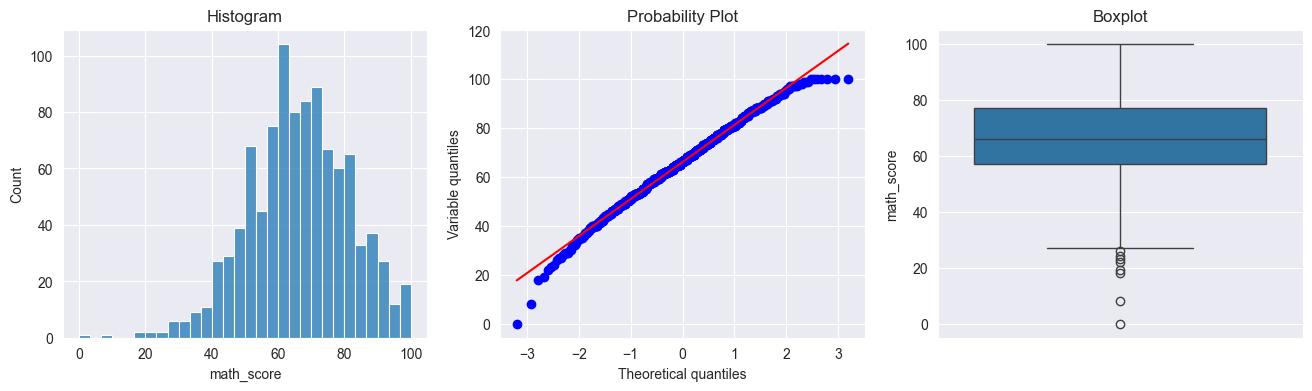

In [53]:
# let's find outliers in MonthlyMinutes

diagnostic_plots(ds, 'math_score')

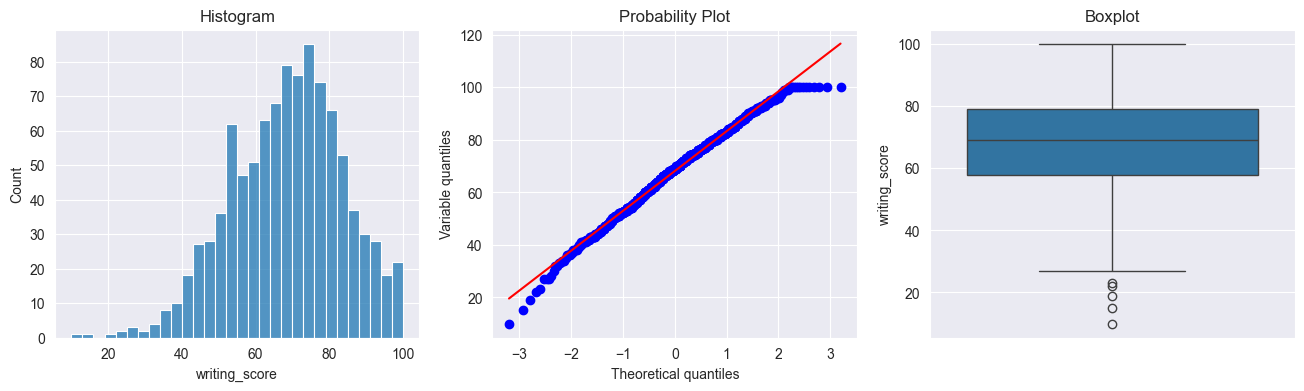

In [54]:
# let's find outliers in age

diagnostic_plots(ds, 'writing_score')

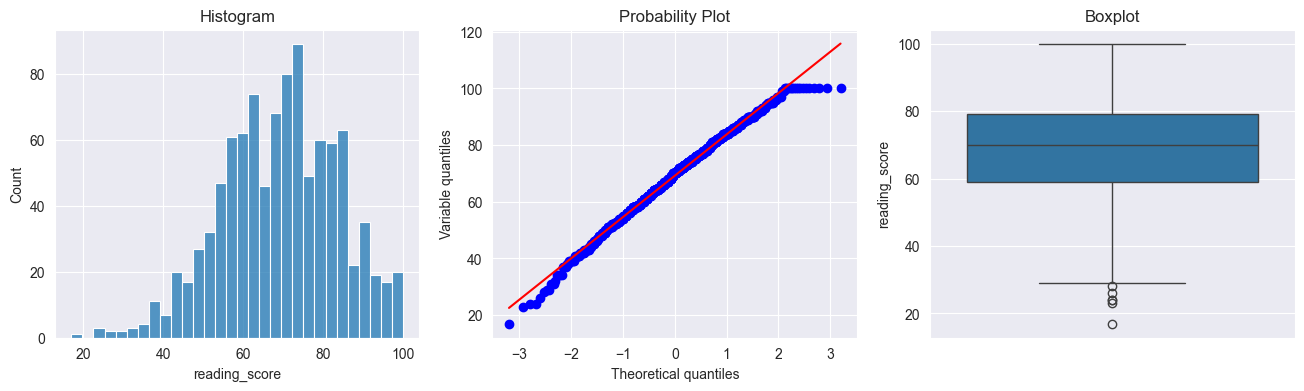

In [55]:
# let's find outliers in previous

diagnostic_plots(ds, 'reading_score')